In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, learning_curve, validation_curve, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from imblearn.under_sampling import RandomUnderSampler

In [11]:
df = pd.read_csv("Project/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Preprocessing

In [12]:
# Converting Date column to datetime object so we can extract Year, Month and Day into 3 separate columns.
df['Date']= pd.to_datetime(df['Date'])

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [13]:
# We can safely drop Date
df = df.drop(['Date'], axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [14]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

We have (quite a lot of) missing values.

In [15]:
df = df.dropna()
print(len(df))

56420


We considered using an imputer for some of the columns with missing values, but decided 56.420 is still enough data to work with, and leaves us with 100% "real" data, which is preferable to imputed data. 

In [16]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

We no longer have missing values.

In [17]:
# Transforming RainToday and RainTomorrow to a binary variable.
df.RainToday.replace({'No': 0, 'Yes': 1}, inplace=True)
df.RainTomorrow.replace({'No': 0, 'Yes': 1}, inplace=True)

/home/ada/anaconda3/envs/Python/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [19]:
df.RainTomorrow.value_counts()

0    43993
1    12427
Name: RainTomorrow, dtype: int64

In [20]:
len(df)

56420

In [21]:
x = "{:.2f}".format(12427/56420)
x = float(x)*100
print(f"{x}% of the data are days where it rains")

22.0% of the data are days where it rains


In [22]:
df['RainTomorrow'].isnull().sum()

0

In [23]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,0,0,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,0,0,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,0,0,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,0,0,2009,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,1010.5,0.0,1.0,24.5,32.3,0,0,2017,6,20
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,1011.2,7.0,0.0,24.8,32.0,0,0,2017,6,21
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,1011.8,0.0,0.0,24.8,32.1,0,0,2017,6,22
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,1010.7,1.0,1.0,24.8,29.2,0,0,2017,6,23


In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,...,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259,2012.221074,6.425009,15.723910
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,...,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425,2.450978,3.451383,8.782527
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,...,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000,2010.000000,3.000000,8.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,...,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000,2012.000000,6.000000,16.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,...,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000,2014.000000,9.000000,23.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,...,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [25]:
df.corr()['RainTomorrow'].head(30)

MinTemp          0.087428
MaxTemp         -0.147467
Rainfall         0.254342
Evaporation     -0.130002
Sunshine        -0.453407
WindGustSpeed    0.233158
WindSpeed9am     0.083904
WindSpeed3pm     0.088862
Humidity9am      0.271033
Humidity3pm      0.455358
Pressure9am     -0.254816
Pressure3pm     -0.230418
Cloud9am         0.323972
Cloud3pm         0.388574
Temp9am         -0.018179
Temp3pm         -0.183586
RainToday        0.309098
RainTomorrow     1.000000
Year            -0.006060
Month            0.001046
Day              0.001359
Name: RainTomorrow, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Te

# Classical Model

In [18]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,0,0,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,0,0,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,0,0,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,0,0,2009,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,1010.5,0.0,1.0,24.5,32.3,0,0,2017,6,20
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,1011.2,7.0,0.0,24.8,32.0,0,0,2017,6,21
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,1011.8,0.0,0.0,24.8,32.1,0,0,2017,6,22
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,1010.7,1.0,1.0,24.8,29.2,0,0,2017,6,23


In [27]:
X = df.copy()
X.drop(['RainTomorrow'], axis=1, inplace=True)
y = df.RainTomorrow

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=.1)

### Testing several models

In [29]:

# Defining numerical and categorical columns so they can be processed in different ways in the Column Transformer
columns = df.columns
numerical_columns = df.select_dtypes(include=['float64']).columns
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Column Transformer: One-Hot Encoding for the categorical columns and MinMaxScaling for the numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', MinMaxScaler(), numerical_columns)
])



# Defining 5 different models in 5 pipelines with the column transformer

# Logistic Regression
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=3000, random_state=42))])

# Random Forest Classifier
ranfor = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

# Linear SVC
lsvm = Pipeline(steps=[('preprocessor', preprocessor),
  
                       ('classifier', LinearSVC())])
# SGD Classifier
sgd = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SGDClassifier())])

# Decision Tree Classifier
dtree = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier())])



In [30]:
# Training the 5 models 
logreg.fit(X_train, y_train)
ranfor.fit(X_train, y_train)
lsvm.fit(X_train, y_train)
sgd.fit(X_train, y_train)
dtree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('num', MinMaxScaler(),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [31]:
def results(name, model):
    preds = model.predict(X_test)

    print(name + " score: %.2f" % model.score(X_test, y_test))
    print(classification_report(y_test, preds))
    labels = [0,1]

    conf_matrix = confusion_matrix(y_test, preds, labels=np.unique(preds))
    plt.figure(figsize= (10,6))
    sns.heatmap(conf_matrix, 
                annot=True, fmt="d", cmap='Blues')
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

Logistic Regression score: 0.86
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4351
           1       0.76      0.57      0.65      1291

    accuracy                           0.86      5642
   macro avg       0.82      0.76      0.78      5642
weighted avg       0.85      0.86      0.85      5642

Random Forest score: 0.87
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4351
           1       0.81      0.54      0.65      1291

    accuracy                           0.87      5642
   macro avg       0.84      0.75      0.78      5642
weighted avg       0.86      0.87      0.86      5642

lSVC score: 0.86
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4351
           1       0.78      0.55      0.64      1291

    accuracy                           0.86      5642
   macro avg       0.83      0.75      0.78      5642

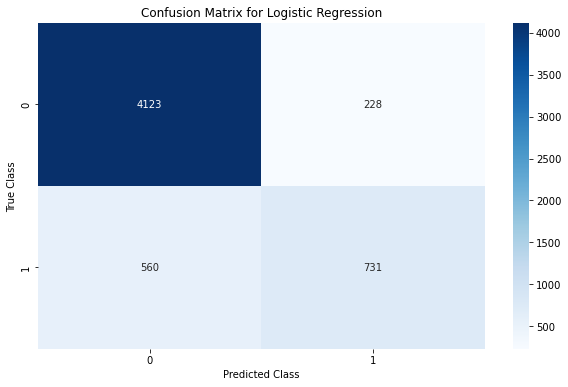

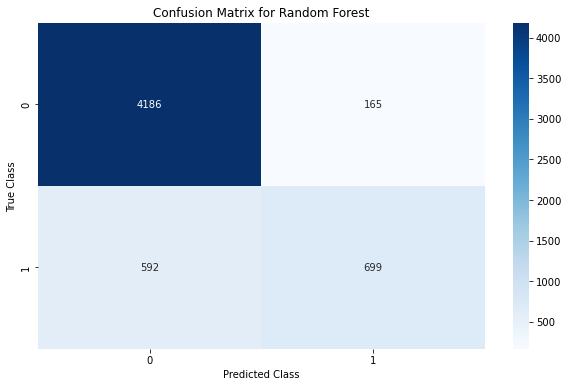

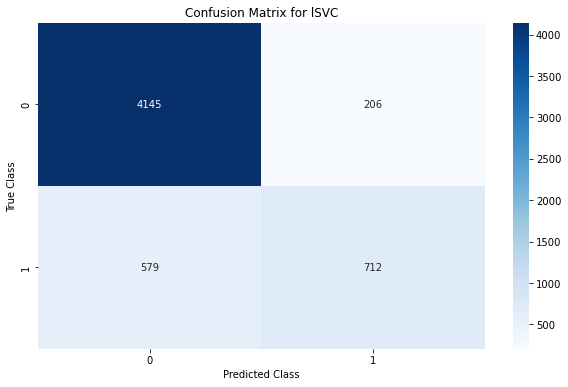

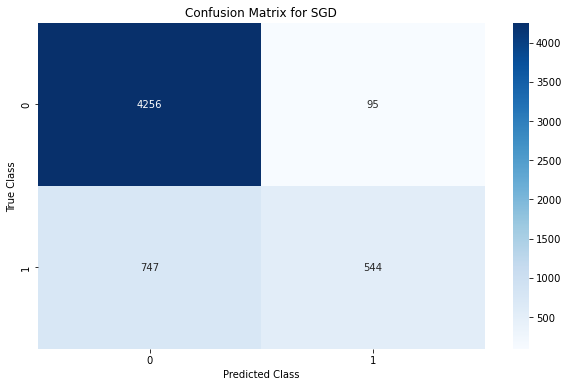

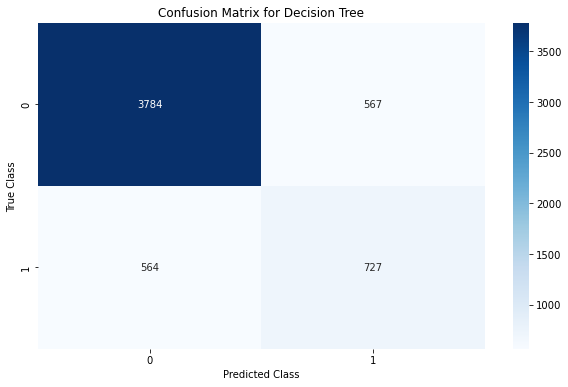

In [32]:
# Classification Reports and Confusion Matrixes
results("Logistic Regression", logreg)
results("Random Forest", ranfor) 
results("lSVC", lsvm)
results("SGD", sgd) 
results("Decision Tree", dtree) 

Random Forest Classifier has the highest accuracy, although it's very similar to Logistic Regression, SVC and SGD. Going forward, we'll do a RandomizedSearchCV on both the Random Forest Classifier and Logistic Regression.

The Decision Tree Classifier has by far the worst accuracy.

### Logistic Regression

In [ ]:
# Checking for parameter keys
logreg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__cat', 'preprocessor__num', 'preprocessor__cat__categories', 'preprocessor__cat__drop', 'preprocessor__cat__dtype', 'preprocessor__cat__handle_unknown', 'preprocessor__cat__sparse', 'preprocessor__num__clip', 'preprocessor__num__copy', 'preprocessor__num__feature_range', 'classifier__C', 'classifier__class_weight', 'classifier__dual', 'classifier__fit_intercept', 'classifier__intercept_scaling', 'classifier__l1_ratio', 'classifier__max_iter', 'classifier__multi_class', 'classifier__n_jobs', 'classifier__penalty', 'classifier__random_state', 'classifier__solver', 'classifier__tol', 'classifier__verbose', 'classifier__warm_start'])

In [ ]:
# Randomized Search: Logistic Regression

param_grid = [{
    'classifier__C': [10.**n for n in range(-5, 5)],
    'classifier__class_weight':['balanced', None],
    'classifier__multi_class': ['auto', 'ovr', 'multinomial']
    }]


logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=3000, random_state=42))])

clf = RandomizedSearchCV(logreg, param_grid, n_jobs=-1, cv=5, verbose=1, scoring='f1_macro')
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'classifier__multi_class': 'multinomial',
 'classifier__class_weight': None,
 'classifier__C': 10.0}

In [ ]:
# Testing logistic regression with the optimized parameters from the randomized search
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(multi_class='multinomial', C=10.0, max_iter=3000, random_state=42))])
logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('num', MinMaxScaler(),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=10.0, max_iter=3000,
                                    multi_class='multinomial',
                                    random_state=42))])

Logistic Regression score: 0.86
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4351
           1       0.76      0.57      0.65      1291

    accuracy                           0.86      5642
   macro avg       0.82      0.76      0.78      5642
weighted avg       0.85      0.86      0.85      5642



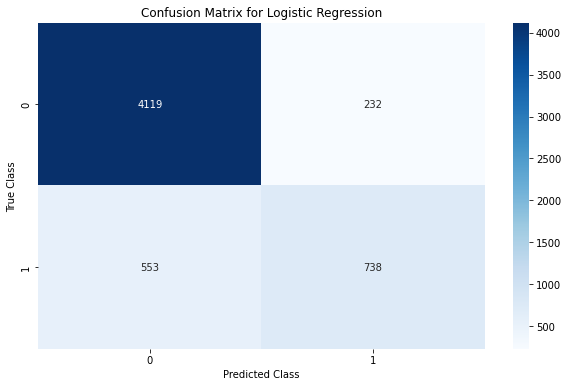

In [ ]:
results("Logistic Regression", logreg)

This made absolutely no difference in the accuracy and f1-scores.

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=logreg, X=X_train, y=y_train, cv=10)

In [ ]:
train_mean = np.mean(train_scores, axis=1) # we want the column mean, so axis=1
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(train_mean, train_std, test_mean, test_std)

[0.86560175 0.85664557 0.85653073 0.85691335 0.85645952] [0.00013129 0.00038379 0.0008813  0.00031493 0.00029109] [0.85162873 0.8556856  0.85611884 0.85572495 0.85574463] [0.00251514 0.00196403 0.00179736 0.00194174 0.0018381 ]


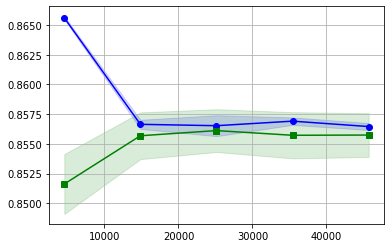

In [ ]:
plt.plot(train_sizes, train_mean, color='blue', marker='o')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.show()

### Random Forest Classifier

In [ ]:
ranfor.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__cat', 'preprocessor__num', 'preprocessor__cat__categories', 'preprocessor__cat__drop', 'preprocessor__cat__dtype', 'preprocessor__cat__handle_unknown', 'preprocessor__cat__sparse', 'preprocessor__num__clip', 'preprocessor__num__copy', 'preprocessor__num__feature_range', 'classifier__bootstrap', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__max_samples', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__oob_s

In [ ]:
from scipy.stats import randint

# Randomized Search: Random Forest Classifier

param_grid = [{
    'classifier__max_depth': [3,5,10, None],
    'classifier__n_estimators':[10,50,100,200,300,500],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__class_weight': ['balanced', 'balanced_subsample', None],
    'classifier__min_samples_leaf': randint(1,4),
    }]

ranfor = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

rs_ranfor = RandomizedSearchCV(ranfor, param_grid, n_jobs=-1, cv=5, verbose=1, scoring='f1_macro', random_state=42)
rs_ranfor.fit(X_train, y_train)
rs_ranfor.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'log2',
 'classifier__min_samples_leaf': 2,
 'classifier__n_estimators': 300}

In [25]:
# # Testing random forest classifier with the optimized parameters from the randomized search

ranfor = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', criterion='gini', max_features='log2', min_samples_leaf=2, n_estimators=300, random_state=42))])
ranfor.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('num', MinMaxScaler(),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features='log2', min_samples_leaf=2,
                                        n_estimators=300, random_state=42))])

Random Forest Classifier score: 0.86
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4351
           1       0.71      0.65      0.68      1291

    accuracy                           0.86      5642
   macro avg       0.81      0.79      0.80      5642
weighted avg       0.86      0.86      0.86      5642



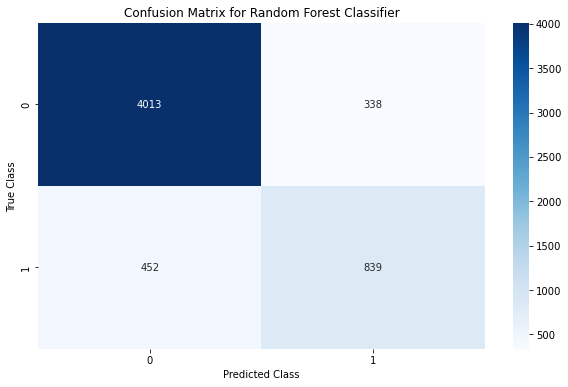

In [26]:
results("Random Forest Classifier", ranfor)

Our accuracy dropped from 87 to 86, but our macro average f1 score increased from 78 to 80.

In [28]:
train_sizes, train_scores, test_scores = learning_curve(estimator=ranfor, X=X_train, y=y_train, cv=10)

In [29]:
train_mean = np.mean(train_scores, axis=1) 
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(train_mean, train_std, test_mean, test_std)

[0.98468271 0.98184756 0.9820927  0.98176582 0.98179431] [0.00065646 0.00020687 0.00042346 0.00037112 0.00039363] [0.84688262 0.85452361 0.85576435 0.85751707 0.85925011] [0.00399144 0.00441759 0.00482584 0.00425489 0.00443655]


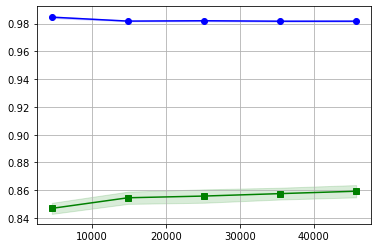

In [30]:
plt.plot(train_sizes, train_mean, color='blue', marker='o')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.show()

## Undersampled

Since our data is quite imbalanced and our model's recall of the less represented class (rainy days) is quite low, we will undersample our train data, hoping it will increase accuracy on the test set.

In [13]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,0,0,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,0,0,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,0,0,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,0,0,2009,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,1010.5,0.0,1.0,24.5,32.3,0,0,2017,6,20
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,1011.2,7.0,0.0,24.8,32.0,0,0,2017,6,21
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,1011.8,0.0,0.0,24.8,32.1,0,0,2017,6,22
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,1010.7,1.0,1.0,24.8,29.2,0,0,2017,6,23


In [11]:
X = df.copy()
X.drop(['RainTomorrow'], axis=1, inplace=True)
y = df.RainTomorrow

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=.1)

In [13]:
y_train.value_counts()

0    39642
1    11136
Name: RainTomorrow, dtype: int64

In [14]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [17]:
y_train_under.value_counts()

0    11136
1    11136
Name: RainTomorrow, dtype: int64

Our train data now has the same amount of 0 labels as 1 labels. Our test data is untouched.

In [18]:
columns = df.columns
numerical_columns = df.select_dtypes(include=['float64']).columns
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', MinMaxScaler(), numerical_columns)
])



logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=3000, random_state=42))])

ranfor = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

lsvm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])

sgd = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SGDClassifier())])

dtree = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier())])



In [19]:
logreg.fit(X_train_under, y_train_under)
ranfor.fit(X_train_under, y_train_under)
lsvm.fit(X_train_under, y_train_under)
sgd.fit(X_train_under, y_train_under)
dtree.fit(X_train_under, y_train_under)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('num', MinMaxScaler(),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [21]:
def results(name, model):
    preds = model.predict(X_test)

    print(name + " score: %.2f" % model.score(X_test, y_test))
    print(classification_report(y_test, preds))
    labels = [0,1]

    conf_matrix = confusion_matrix(y_test, preds, labels=np.unique(preds))
    plt.figure(figsize= (10,6))
    sns.heatmap(conf_matrix, 
                annot=True, fmt="d", cmap='Blues')
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

Logistic Regression score: 0.81
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4351
           1       0.55      0.81      0.66      1291

    accuracy                           0.81      5642
   macro avg       0.74      0.81      0.76      5642
weighted avg       0.85      0.81      0.82      5642

Random Forest score: 0.81
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      4351
           1       0.56      0.84      0.67      1291

    accuracy                           0.81      5642
   macro avg       0.75      0.82      0.77      5642
weighted avg       0.86      0.81      0.82      5642

lSVC score: 0.81
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4351
           1       0.55      0.81      0.66      1291

    accuracy                           0.81      5642
   macro avg       0.74      0.81      0.76      5642

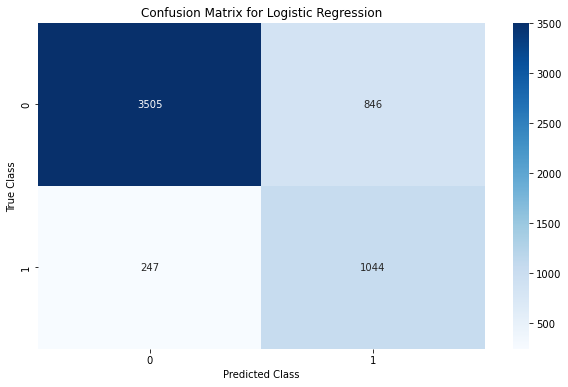

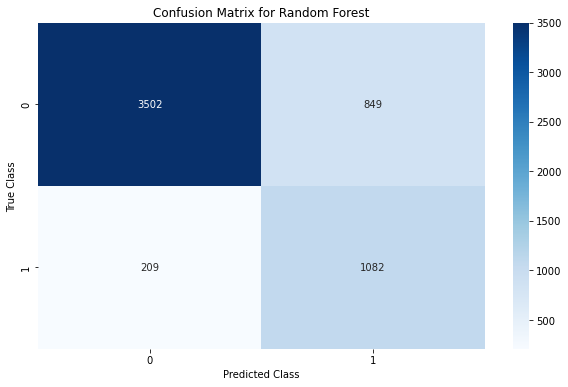

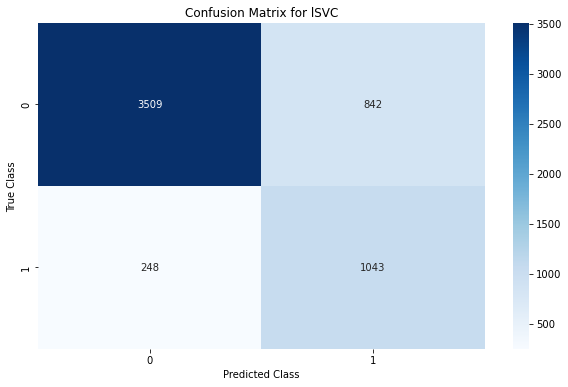

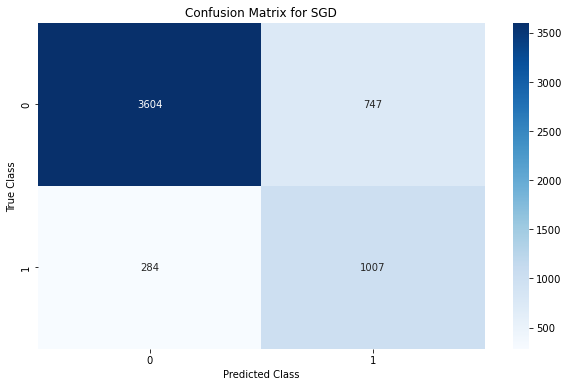

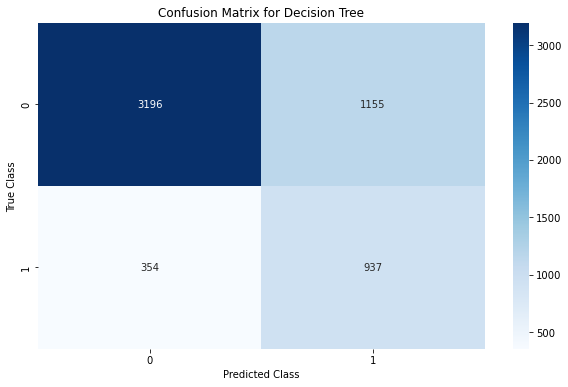

In [22]:
results("Logistic Regression", logreg)
results("Random Forest", ranfor) 
results("lSVC", lsvm)
results("SGD", sgd) 
results("Decision Tree", dtree) 

The results are worse than without the undersampling. Recall for the 1 label is understandably higher, but our overall accuracy and macro average f1 scores are lower.

## Testing Dataset subsets

We want to see whether our model is better at predicting RainTomorrow when it's the same as the day before or different.

### With only days different than previous day

In [74]:
df_subset = df[df.RainToday != df.RainTomorrow]

In [75]:
df_subset[['RainToday', 'RainTomorrow']]

,RainToday,RainTomorrow
6067,0,1
6068,1,0
6070,0,1
6072,1,0
6082,0,1
...,...,...
142234,1,0
142236,0,1
142237,1,0
142244,0,1


We're left with only rows where there is a difference between RainToday and RainTomorrow.

In [76]:
df_subset

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6067,Cobar,21.4,37.5,0.0,14.8,6.9,NNE,43.0,ENE,NNE,...,1009.6,7.0,6.0,26.2,34.1,0,1,2009,1,19
6068,Cobar,23.3,39.4,4.8,12.0,10.9,W,59.0,N,NW,...,1008.5,1.0,7.0,27.0,37.0,1,0,2009,1,20
6070,Cobar,21.8,30.7,0.0,8.0,5.9,WNW,56.0,N,N,...,1006.2,7.0,7.0,24.4,27.3,0,1,2009,1,22
6072,Cobar,22.1,34.7,8.6,8.6,12.4,NNW,50.0,SSW,SW,...,1008.3,2.0,6.0,28.1,33.2,1,0,2009,1,24
6082,Cobar,23.6,40.4,0.6,11.8,12.2,WSW,54.0,E,SSW,...,1005.0,1.0,2.0,29.9,38.7,0,1,2009,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142234,Darwin,25.6,33.0,7.2,5.6,7.9,ENE,39.0,ENE,NE,...,1008.4,5.0,3.0,29.3,32.5,1,0,2017,4,17
142236,Darwin,25.2,33.5,0.0,4.8,11.2,ENE,37.0,E,WNW,...,1010.1,1.0,4.0,28.9,33.1,0,1,2017,4,19
142237,Darwin,24.7,33.7,1.8,6.2,9.7,ENE,33.0,ESE,ENE,...,1010.0,6.0,6.0,27.7,33.1,1,0,2017,4,20
142244,Darwin,24.4,27.4,0.2,2.2,0.0,ESE,39.0,SE,ESE,...,1008.8,8.0,8.0,25.5,25.9,0,1,2017,4,27


In [77]:
df_subset.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [78]:
df_subset.RainTomorrow.value_counts()

0    6719
1    6684
Name: RainTomorrow, dtype: int64

In [79]:
len(df_subset)

13403

In [5]:
x = "{:.2f}".format(6684/13403)
x = float(x)*100
print(f"{x}% of the data are days where it rains")

50.0% of the data are days where it rains


In [28]:
# we drop RainToday and Rainfall since they now have a perfect correlation with our target variable
X = df_subset.copy()
X.drop(['RainTomorrow', 'RainToday', 'Rainfall'], axis=1, inplace=True) 
y = df_subset.RainTomorrow

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=10, test_size=.1)

In [34]:
columns = X.columns
numerical_columns = X.select_dtypes(include=['float64']).columns
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', MinMaxScaler(), numerical_columns)
])



logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=3000, random_state=42))])

ranfor = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

lsvm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])

sgd = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SGDClassifier())])

dtree = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier())])


In [35]:
logreg.fit(X_train, y_train)
ranfor.fit(X_train, y_train)
lsvm.fit(X_train, y_train)
sgd.fit(X_train, y_train)
dtree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('num', MinMaxScaler(),
                                                  Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

Logistic Regression score: 0.77
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       675
           1       0.77      0.78      0.77       666

    accuracy                           0.77      1341
   macro avg       0.77      0.77      0.77      1341
weighted avg       0.77      0.77      0.77      1341

Random Forest score: 0.79
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       675
           1       0.79      0.79      0.79       666

    accuracy                           0.79      1341
   macro avg       0.79      0.79      0.79      1341
weighted avg       0.79      0.79      0.79      1341

lSVC score: 0.78
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       675
           1       0.78      0.78      0.78       666

    accuracy                           0.78      1341
   macro avg       0.78      0.78      0.78      1341

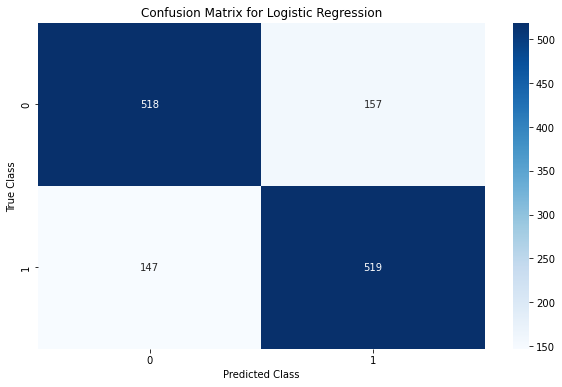

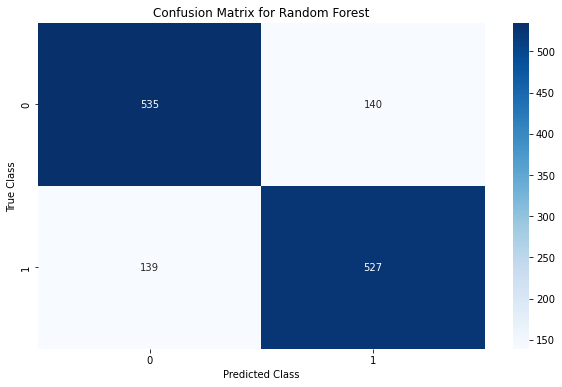

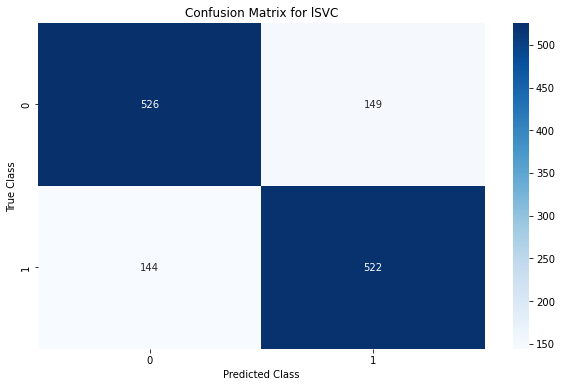

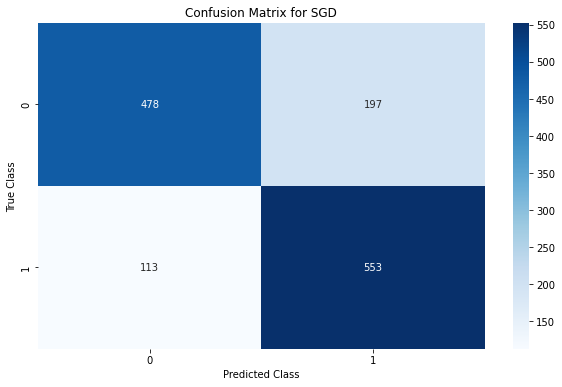

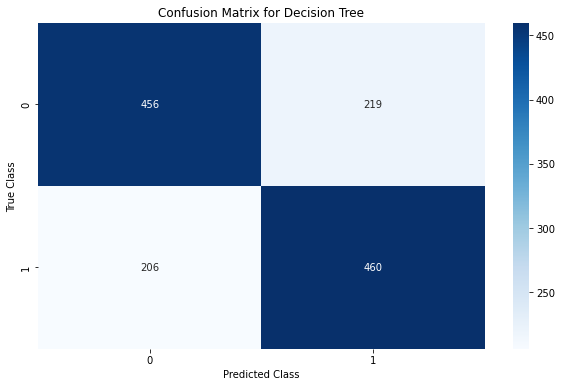

In [36]:
results("Logistic Regression", logreg)
results("Random Forest", ranfor) 
results("lSVC", lsvm)
results("SGD", sgd) 
results("Decision Tree", dtree) 

The accuracy is lower (going from 86 on average to 77 on average) but the macro average scores are approximately the same, or slightly better (in the case of Random Forest 78 -> 79)

### With only days same as before

In [81]:
df_subset = df[df.RainToday == df.RainTomorrow]

In [82]:
df_subset[['RainToday', 'RainTomorrow']]

,RainToday,RainTomorrow
6049,0,0
6050,0,0
6052,0,0
6053,0,0
6054,0,0
...,...,...
142298,0,0
142299,0,0
142300,0,0
142301,0,0


We're no left with only rows where RainToday is the same as RainTomorrow. We are expecting a higher accuracy here.

In [83]:
df_subset.RainTomorrow.value_counts()

0    37274
1     5743
Name: RainTomorrow, dtype: int64

In [84]:
len(df_subset)

43017

<AxesSubplot:>

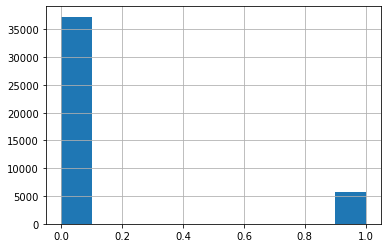

In [45]:
df_subset.RainTomorrow.hist()

In [6]:
x = "{:.2f}".format(5743/43017)
x = float(x)*100
print(f"{x}% of the data are days where it rains")

13.0% of the data are days where it rains


Our data is even more imbalanced now.

In [40]:
X = df_subset.copy()
X.drop(['RainTomorrow', 'RainToday', 'Rainfall'], axis=1, inplace=True)
y = df_subset.RainTomorrow

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=10, test_size=.1)

In [42]:
columns = X.columns
numerical_columns = X.select_dtypes(include=['float64']).columns
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', MinMaxScaler(), numerical_columns)
])



logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=3000, random_state=42))])

ranfor = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

lsvm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])

sgd = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SGDClassifier())])

dtree = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier())])


In [43]:
logreg.fit(X_train, y_train)
ranfor.fit(X_train, y_train)
lsvm.fit(X_train, y_train)
sgd.fit(X_train, y_train)
dtree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('num', MinMaxScaler(),
                                                  Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

Logistic Regression score: 0.95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3791
           1       0.83      0.72      0.77       511

    accuracy                           0.95      4302
   macro avg       0.90      0.85      0.87      4302
weighted avg       0.95      0.95      0.95      4302

Random Forest score: 0.95
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3791
           1       0.87      0.71      0.78       511

    accuracy                           0.95      4302
   macro avg       0.92      0.85      0.88      4302
weighted avg       0.95      0.95      0.95      4302

lSVC score: 0.95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3791
           1       0.83      0.72      0.77       511

    accuracy                           0.95      4302
   macro avg       0.89      0.85      0.87      4302

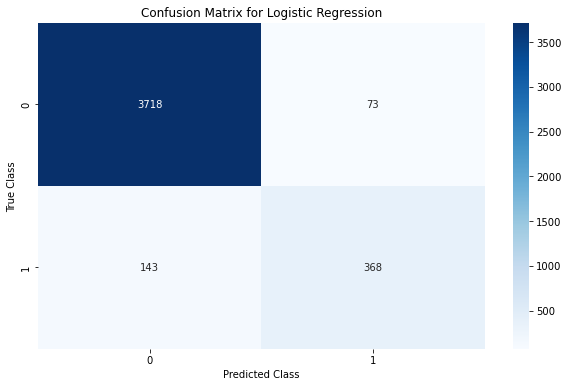

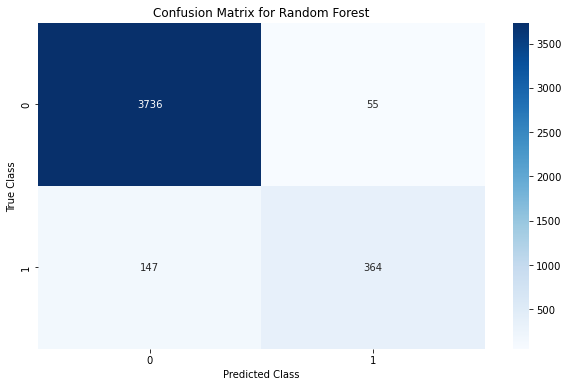

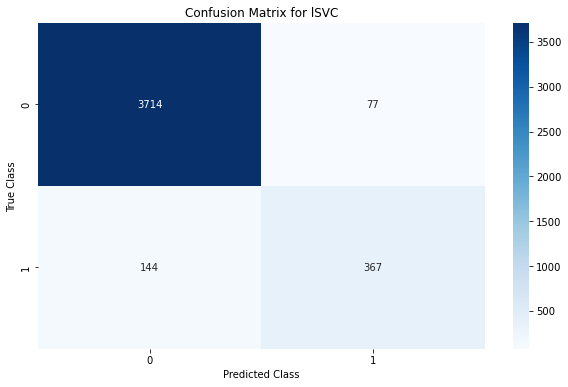

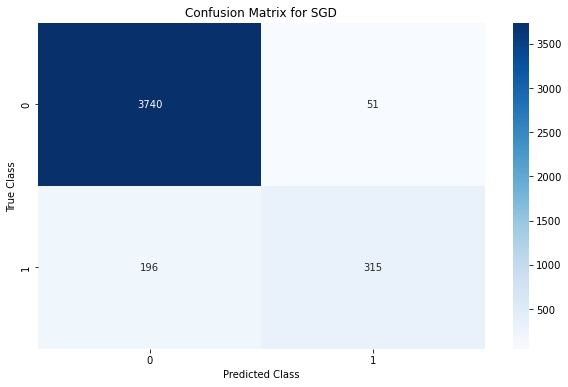

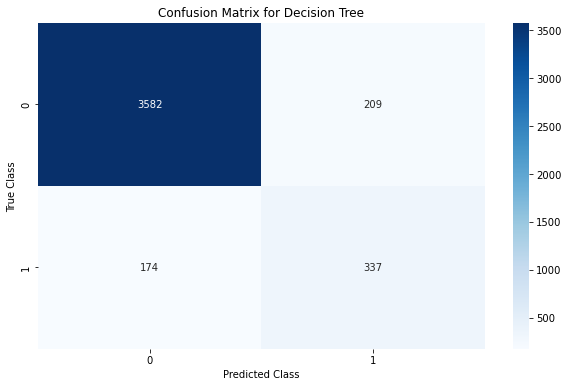

In [44]:
results("Logistic Regression", logreg)
results("Random Forest", ranfor) 
results("lSVC", lsvm)
results("SGD", sgd) 
results("Decision Tree", dtree) 

Even though we exclude the "Rain Today" column from our training data, the accuracy of this model (where the data includes only days with the same weather as the day before), is a lot higher than any of the previous subsets of data. Surprisingly, although the data is very imbalanced, this data also predicts the rainy days better than the previous models.